In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import datetime
from datetime import timedelta
from dateutil import rrule

import time
import matplotlib.dates as mdates

In [29]:
# Load the data from the CSV file

data = pd.read_csv('updated_filtered_zhvi_price_data.csv')

# Set "RegionFullName" as the index
data.set_index('RegionFullName', inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6218 entries, New York.NY to Fort Howard.MD
Columns: 292 entries, RegionID to 2023-08-31
dtypes: float64(284), int64(2), object(6)
memory usage: 13.9+ MB


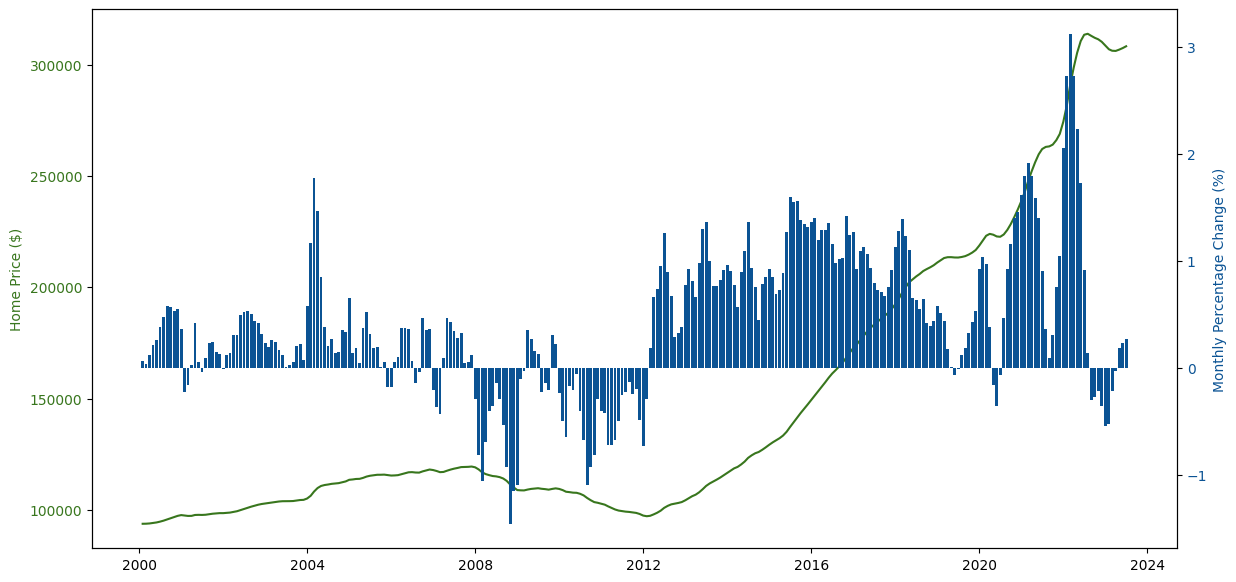

In [31]:


# Assuming you've already loaded your data and selected the city region
city = 'Dallas'  # Set the city name dynamically
city_data = data[data['RegionName'] == city].iloc[0]
prices = pd.to_numeric(city_data[8:-1])  # Assuming home prices start from the 9th column
monthly_pct_change = prices.pct_change(1) * 100  # Calculate percentage change monthly

# Adjust the dates to skip the first month
dates = pd.to_datetime(city_data.index[8:-1])[1:].to_period('M')

# Initialize the plot with specified figure size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Normally, ax1 would be for % change and ax2 for prices.
# We are switching them here so ax1 will be for home prices.
color_price = '#38761d'  # A darker shade of green
ax1.plot(dates.to_timestamp(), prices[1:], color=color_price, label='Home Price ($)')
ax1.set_ylabel('Home Price ($)', color=color_price)
ax1.tick_params(axis='y', labelcolor=color_price)

# Create a secondary y-axis for monthly percentage change now
ax2 = ax1.twinx()
color_pct = '#0b5394'  # A darker shade of blue
ax2.bar(dates.to_timestamp(), monthly_pct_change.dropna(), width=25, color=color_pct, label='Monthly % Change', align='center')
ax2.set_ylabel('Monthly Percentage Change (%)', color=color_pct)
ax2.tick_params(axis='y', labelcolor=color_pct)


Enter the city name:  Metuchen
Enter the state abbreviation (e.g., TX for Texas):  NJ


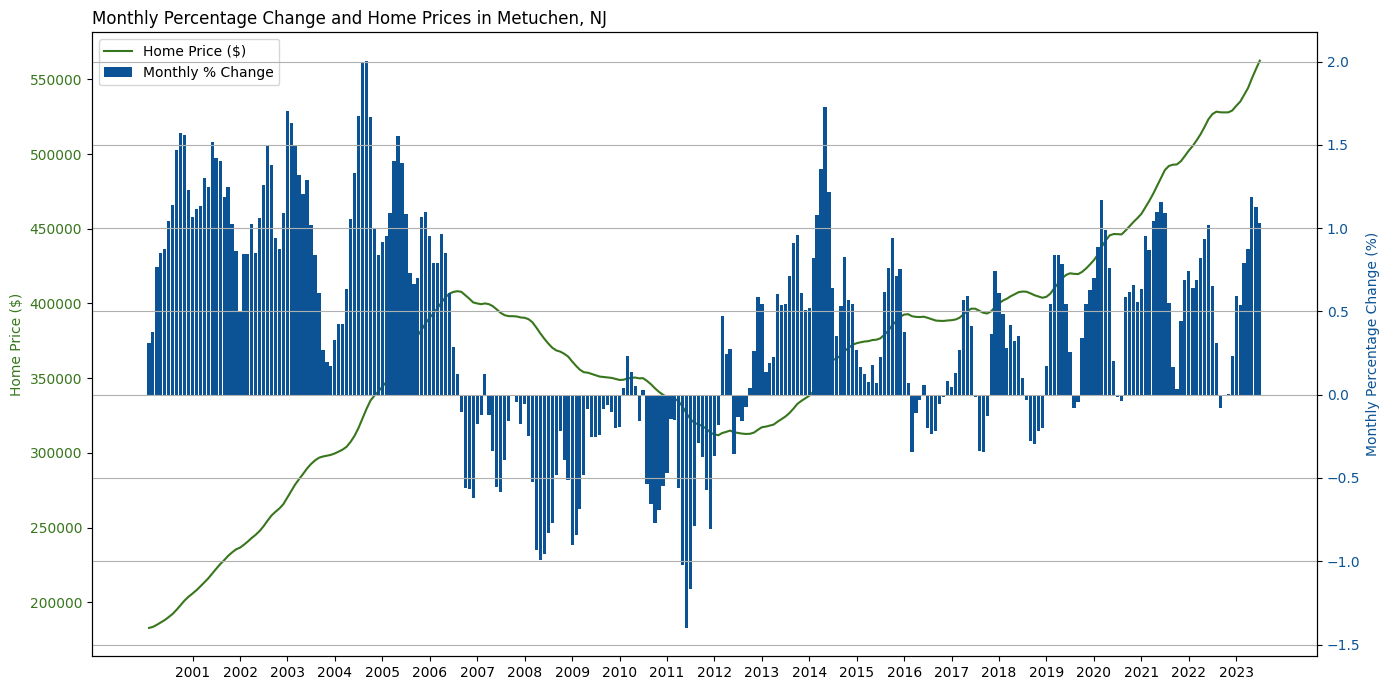

In [40]:

# Prompt the user to input the city and state
city = input("Enter the city name: ")
state = input("Enter the state abbreviation (e.g., TX for Texas): ")

# Filter data based on both city and state
city_data = data[(data['RegionName'] == city) & (data['State'] == state)].iloc[0]
prices = pd.to_numeric(city_data[8:-1])  # Assuming home prices start from the 9th column
monthly_pct_change = prices.pct_change(1) * 100  # Calculate percentage change monthly

# Adjust the dates to skip the first month
dates = pd.to_datetime(city_data.index[8:-1])[1:].to_period('M')

# Initialize the plot with specified figure size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Set up the plot for home prices
color_price = '#38761d'  # A darker shade of green
ax1.plot(dates.to_timestamp(), prices[1:], color=color_price, label='Home Price ($)')
ax1.set_ylabel('Home Price ($)', color=color_price)
ax1.tick_params(axis='y', labelcolor=color_price)

# Create a secondary y-axis for monthly percentage change
ax2 = ax1.twinx()
color_pct = '#0b5394'  # A darker shade of blue
ax2.bar(dates.to_timestamp(), monthly_pct_change.dropna(), width=25, color=color_pct, label='Monthly % Change', align='center')
ax2.set_ylabel('Monthly Percentage Change (%)', color=color_pct)
ax2.tick_params(axis='y', labelcolor=color_pct)

# Set x-ticks to only display the first month of each year for clarity
ax2.set_xticks([date.to_timestamp() for date in dates if date.month == 1])
ax2.set_xticklabels([date.strftime('%Y') for date in dates if date.month == 1], rotation=45)

# Add a title and grid, making the title dynamic to the city and state name
plt.title(f'Monthly Percentage Change and Home Prices in {city}, {state}', loc='left')  # Title anchored to the left
plt.grid(True)

# Adding a legend that combines both plots but with inverted labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()
plt.show()


Enter the city name:  Metuchen
Enter the state abbreviation (e.g., TX for Texas):  NJ
Enter the starting month (e.g., 1 for January):  6
Enter the starting year (e.g., 2020):  2015
Enter the ending month (e.g., 12 for December):  6
Enter the ending year (e.g., 2021):  2024


/var/folders/4s/zsy8m17s2xqg3cly0rcf_5fm0000gn/T/ipykernel_34387/2092473073.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_data['Date'] = pd.to_datetime(price_data['Date'], errors='coerce')


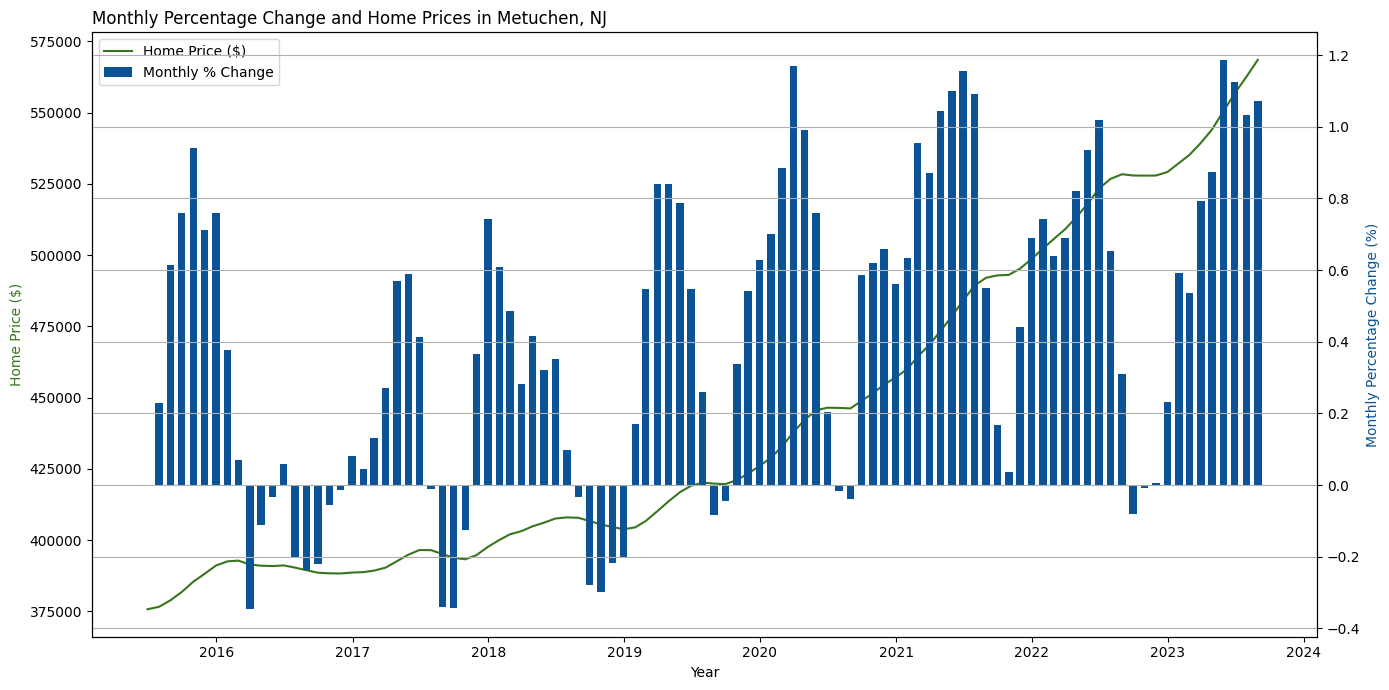

In [41]:

# Prompt the user for city, state, and date range
city = input("Enter the city name: ")
state = input("Enter the state abbreviation (e.g., TX for Texas): ")
start_month = int(input("Enter the starting month (e.g., 1 for January): "))
start_year = int(input("Enter the starting year (e.g., 2020): "))
end_month = int(input("Enter the ending month (e.g., 12 for December): "))
end_year = int(input("Enter the ending year (e.g., 2021): "))

# Convert the user input into start and end dates
start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
end_date = pd.Timestamp(year=end_year, month=end_month, day=1)

# Filter data based on city, state, and date range
city_data = data[(data['RegionName'] == city) & (data['State'] == state)]

if city_data.empty:
    raise ValueError(f"No data found for city '{city}' in state '{state}'.")

# Get the price data and filter based on the date range
# Ensure you're selecting only the columns that are meant to represent dates
price_data = city_data.iloc[:, 7:].transpose().reset_index()  # Adjust if prices start at a different column
price_data.columns = ['Date', 'Price']
price_data['Date'] = pd.to_datetime(price_data['Date'], errors='coerce')
price_data = price_data.set_index('Date')
filtered_prices = price_data[(price_data.index >= start_date) & (price_data.index <= end_date)].dropna()

# Calculate monthly percentage change
monthly_pct_change = filtered_prices.pct_change(1) * 100

# Initialize the plot with specified figure size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Set up the plot for home prices
color_price = '#38761d'  # A darker shade of green
ax1.plot(filtered_prices.index, filtered_prices['Price'], color=color_price, label='Home Price ($)')

# Create a secondary y-axis for monthly percentage change
ax2 = ax1.twinx()
color_pct = '#0b5394'  # A darker shade of blue
ax2.bar(filtered_prices.index, monthly_pct_change['Price'], width=20, color=color_pct, label='Monthly % Change')

# Format the dates on the x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Add labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Home Price ($)', color=color_price)
ax2.set_ylabel('Monthly Percentage Change (%)', color=color_pct)
plt.title(f'Monthly Percentage Change and Home Prices in {city}, {state}', loc='left')

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Grid and tight layout
plt.grid(True)
plt.tight_layout()
plt.show()
